### This project aims at cleaning a dataset of 356027 rows and 163 columns that contains informations on various food products. Then, the goal is to extract relevant informations on the products' characteristics.

In [154]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np 
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

df_food = pd.read_csv(r'/Users/lauragztto/Desktop/EPFL_EXTENSION_SCHOOL/Course project 2/en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)
df_food.shape

(356027, 163)

## A. Data Cleaning

In [155]:
df_foodnullcol = df_food.isnull().sum(axis=0)
df_foodnullcol

code                           26
url                            26
creator                         3
created_t                       3
created_datetime               10
                            ...  
carbon-footprint_100g      355749
nutrition-score-fr_100g    101171
nutrition-score-uk_100g    101171
glycemic-index_100g        356027
water-hardness_100g        356027
Length: 163, dtype: int64

In [156]:
#choose all columns where there are 100% NA
null100 = df_foodnullcol[df_foodnullcol/356027 == 1]
df_null100 = null100.to_frame().T
df_null100

,no_nutriments,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,-butyric-acid_100g,-caproic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-melissic-acid_100g,-elaidic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,chlorophyl_100g,glycemic-index_100g,water-hardness_100g
0,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027,356027


In [157]:
#drop all columns where there are 100% NA
df_food.drop(columns=df_null100.columns,inplace=True)

We would like now to drop rows that do not have a product name. We will first replace the rows that have a generic name but not a product name before droping the NaN. We will pursue after this with various entries to clean our dataset.

In [158]:
generic_but_not_product_name = df_food.loc[df_food['product_name'].isna() & ~df_food['generic_name'].isna()]['generic_name']

In [159]:
#replace where Nan in product name with generic name
df_food.loc[generic_but_not_product_name.index,'product_name'] = generic_but_not_product_name

In [160]:
df_food.loc[df_food['product_name'].isna() & ~df_food['generic_name'].isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [161]:
product_name_na = df_food.loc[df_food['product_name'].isna()]
product_name_na
#drop all rows that does not have a product name
df_food.drop(product_name_na.index,inplace=True)

In [162]:
df_food.shape

(338629, 147)

In [163]:
#drop name that have test 
df_food.drop(df_food.loc[df_food['product_name'].str.contains(' test')].index,inplace=True)

In [164]:
#replace all non english characters
df_food.loc[:,'product_name'] = df_food.loc[:,'product_name'].str.replace("é","e")
df_food.loc[:,'product_name'] = df_food.loc[:,'product_name'].str.replace('[^\x00-\x7F]',"")

In [165]:
white_space = df_food.loc[df_food.product_name.str.isspace()]

In [166]:
df_food.drop(white_space.index,inplace=True)

In [167]:
#drop all values that have been added by people that are not in the 99% of creators
creators = df_food['creator'].value_counts().sort_values(ascending=False)
proportion_creators = creators/len(df_food)
proportion_creators.loc[proportion_creators > 0.01]

usda-ndb-import               0.502936
openfoodfacts-contributors    0.115719
kiliweb                       0.107622
date-limite-app               0.031123
openfood-ch-import            0.025078
tacite                        0.023304
sebleouf                      0.018598
Name: creator, dtype: float64

In [168]:
list_creator = proportion_creators.loc[proportion_creators > 0.01]
list_creator
creators_not_99 = df_food.loc[~df_food['creator'].isin(list_creator.index)]

In [169]:
df_food.drop(creators_not_99.index,inplace=True)

In [170]:
df_food.shape

(278363, 147)

Let's take a look at the Nutrition columns

In [171]:
nutrition = [col for col in df_food.columns if '100g' in col]
df_nutrition = df_food.loc[:,df_food.columns.isin(nutrition)]
df_nutrition

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356022,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
356024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#delete all columns where there are at least 99% of NA
df_nutrinull = df_nutrition.isnull().sum(axis=0)
df_nutrinull
#choose all columns where there are 99% NA
null99 = df_nutrinull[df_nutrinull/278363 >= 0.99 ]
nutrinull99 = null99.to_frame().T
nutrinull99

df_food.drop(columns=nutrinull99.columns,inplace=True)

In [173]:
df_food.shape

(278363, 90)

In [174]:
cols = df_food.columns[7:].to_list()+['creator']

In [175]:
#Check all duplicates
duplicates = df_food.loc[df_food.duplicated(subset=cols)]
duplicates.shape

(2868, 90)

In [176]:
df_food.drop_duplicates(subset=cols, inplace=True)

In [177]:
df_food.shape

(275495, 90)

Let's look at the Outliers

In [178]:
#Check for outliers
df_food.describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,230840.0,1.963949,2.539453e+00,0.00000,0.000000e+00,1.000000,3.000000,3.000000e+01
ingredients_from_palm_oil_n,230840.0,0.019299,1.390776e-01,0.00000,0.000000e+00,0.000000,0.000000,2.000000e+00
ingredients_that_may_be_from_palm_oil_n,230840.0,0.050520,2.543582e-01,0.00000,0.000000e+00,0.000000,0.000000,6.000000e+00
energy_100g,246624.0,1131.997870,9.444338e+02,0.00000,3.850000e+02,1117.000000,1674.000000,2.311990e+05
fat_100g,231745.0,12.683616,1.742154e+01,0.00000,0.000000e+00,5.000000,20.000000,1.000000e+02
saturated-fat_100g,219869.0,5.045527,7.905930e+00,0.00000,0.000000e+00,1.790000,7.140000,5.500000e+02
monounsaturated-fat_100g,20901.0,9.887473,1.606144e+01,0.00000,0.000000e+00,3.770000,10.000000,1.000000e+02
polyunsaturated-fat_100g,20921.0,6.108982,1.052050e+01,0.00000,0.000000e+00,2.110000,7.140000,9.800000e+01
trans-fat_100g,139712.0,0.073151,1.553464e+00,-3.57000,0.000000e+00,0.000000,0.000000,3.690000e+02
cholesterol_100g,140338.0,0.020169,3.627629e-01,0.00000,0.000000e+00,0.000000,0.021000,9.523800e+01


In [179]:
energy_outliers = df_food.loc[(df_food['energy_100g']>5000)& (df_food['quantity'].isna())]
df_food.drop(energy_outliers.index,inplace=True)
df_food.shape

(275459, 90)

In [180]:
nutrition = [col for col in df_food.columns if '100g' in col]

In [181]:
nutrition[1:-2]

['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-d_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'potassium_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g']

In [182]:
#drop all values that are above 100g
df_food = df_food.loc[~(df_food[nutrition[1:-2]]>100).any(axis=1)]

In [183]:
#drop all rows that have negative values that makes no sense
df_food = df_food.loc[~(df_food[nutrition[1:-2]]<0).any(axis=1)]

In [184]:
#drop columns that are repetitive or irrelevant for the analysis
df_food.drop(['last_modified_t', 'created_t','countries_tags','states_tags','states_en','packaging_tags','manufacturing_places_tags','emb_codes_tags','labels_tags','categories_tags','brands_tags','origins_tags','labels','cities','cities_tags','allergens','allergens_en','traces','traces_tags','additives_tags','main_category','image_url','image_small_url'],axis=1,inplace=True)


What about the column quantity?

In [185]:
#quantity seems to have a lot of different values
df_food.groupby('quantity').nunique().index

Index([' ', ' (25 sticks)', ' 0,33L', ' 1', ' 1 L', ' 1 l', ' 1 litre',
       ' 1 lt', ' 1 plaque de 400gr', ' 1,1 kg',
       ...
       'x4 poids net 400g', 'x8 480ml / 400g', 'yi', '~1 kg',
       'الثمن للواحدة 10 دراهم', 'لحم الديك الرومي', 'ماونتن ديو', '١ل', '٢',
       '一包'],
      dtype='object', name='quantity', length=8479)

In [186]:
#replace all non english characters in quantity
df_food.loc[:,'quantity'] = df_food.loc[:,'quantity'].str.replace("é","e")
df_food.loc[:,'quantity'] = df_food.loc[:,'quantity'].str.replace('[^\x00-\x7F]',"")

In [187]:
df_food.groupby('quantity').nunique().index

Index(['', ' ', '  ', '  10 ', ' (25 sticks)', ' 0,33L', ' 1', ' 1 L', ' 1 l',
       ' 1 litre',
       ...
       'una barra', 'una bottiglia', 'variable', 'x 6', 'x12', 'x4',
       'x4 poids net 400g', 'x8 480ml / 400g', 'yi', '~1 kg'],
      dtype='object', name='quantity', length=8441)

In [188]:
df_food.quantity = df_food.quantity.astype(str)
df_food = df_food.loc[~df_food['quantity'].str.isspace()]
df_food.shape

(275216, 67)

In [189]:
#we keep only one country specific columns
df_food[['countries','countries_en']]
df_food.drop(['countries'], axis=1, inplace=True)

In [190]:
df_food.rename(columns={'countries_en':'countries'}, inplace=True)

What about palm oil?

In [191]:
df_food
df_food[['ingredients_from_palm_oil_n',
'ingredients_from_palm_oil_tags',
'ingredients_that_may_be_from_palm_oil_n',
'ingredients_that_may_be_from_palm_oil_tags']].dtypes

ingredients_from_palm_oil_n                   float64
ingredients_from_palm_oil_tags                 object
ingredients_that_may_be_from_palm_oil_n       float64
ingredients_that_may_be_from_palm_oil_tags     object
dtype: object

In [192]:
df_food
df_food[['ingredients_from_palm_oil_n',
'ingredients_from_palm_oil_tags',
'ingredients_that_may_be_from_palm_oil_n',
'ingredients_that_may_be_from_palm_oil_tags']].isnull().sum()/275216

ingredients_from_palm_oil_n                   0.162149
ingredients_from_palm_oil_tags                0.983991
ingredients_that_may_be_from_palm_oil_n       0.162149
ingredients_that_may_be_from_palm_oil_tags    0.963345
dtype: float64

In [193]:
#drop ingredients_from_palm_oil_tags & ingredients_that_may_be_from_palm_oil_tags that have too much NaN
df_food.drop(['ingredients_from_palm_oil_tags'], axis=1, inplace=True)

In [194]:
df_food.drop(['ingredients_that_may_be_from_palm_oil_tags'], axis=1, inplace=True)

Let's have a look at all the columns now

In [195]:
df_food.columns.to_list()

['code',
 'url',
 'creator',
 'created_datetime',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'brands',
 'categories',
 'categories_en',
 'origins',
 'manufacturing_places',
 'labels_en',
 'emb_codes',
 'first_packaging_code_geo',
 'purchase_places',
 'stores',
 'countries',
 'ingredients_text',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'main_category_en',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-d_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'fo

In [196]:
#drop values that do not have the same nutrition score in uk and fr
na = df_food['nutrition-score-fr_100g'].isna() & df_food['nutrition-score-uk_100g'].isna()
not_equal = ~(df_food['nutrition-score-fr_100g']==df_food['nutrition-score-uk_100g'])
not_same_nutrition_score = df_food.loc[not_equal & ~na]

In [197]:
df_food.drop(not_same_nutrition_score.index, inplace=True)

In [198]:
df_food.shape

(266680, 64)

In [199]:
df_food.drop(['nutrition-score-uk_100g'],axis=1,inplace=True)

In [200]:
df_food.rename(columns={'nutrition-score-fr_100g':'nutrition_score'}, inplace=True)

In [201]:
#Now we will use product_name as the index to help visualisation
df_food.set_index('product_name', inplace=True)

In [202]:
nutrition = [col for col in df_food.columns if '100g' in col]

## B. In depth Analysis

### B1. We would like to find which countries sell the most unhealthy products. We will take salt, sugar, saturated fats, proteins and fibers as the factors. We will give a score to each products and then group them by countries.

In [203]:
df1 = df_food.copy()
df1.salt_100g.describe()

count    235850.000000
mean          1.648997
std           6.388387
min           0.000000
25%           0.076200
50%           0.609600
75%           1.400000
max         100.000000
Name: salt_100g, dtype: float64

In [204]:
#we have to fix a limit as we do not want to see products like salt or pepper that have obviously very high proportion of salts. I decided to take a limit rounded to the mean + 3std of the population.
Limit_salt = df1[(df1['salt_100g']>21)].index
df1.drop(Limit_salt,inplace=True)

In [205]:
#we will now do the same with saturated fat and sugars
df1.sugars_100g.describe()

count    223982.000000
mean         16.363046
std          21.355008
min           0.000000
25%           1.400000
50%           5.880000
75%          25.000000
max         100.000000
Name: sugars_100g, dtype: float64

In [206]:
Limit_sugar = df1[(df1['sugars_100g']>80)].index
df1.drop(Limit_sugar,inplace=True)

In [207]:
df1['saturated-fat_100g'].describe()

count    206313.000000
mean          5.133558
std           7.815812
min           0.000000
25%           0.000000
50%           2.000000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64

In [208]:
Limit_saturated = df1[(df1['saturated-fat_100g']>29)].index
df1.drop(Limit_saturated,inplace=True)

In [209]:
q1 = df1[['countries','salt_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g']]
q1

,countries,salt_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g
product_name,,,,,,
Farine de ble noir,France,NaN,NaN,NaN,NaN,NaN
Banana Chips Sweetened (Whole),United States,0.00000,28.57,14.29,3.57,3.6
Peanuts,United States,0.63500,0.00,17.86,17.86,7.1
Organic Salted Nut Mix,United States,1.22428,5.36,3.57,17.86,7.1
Organic Polenta,United States,NaN,NaN,NaN,8.57,5.7
...,...,...,...,...,...,...
Tomato & ricotta,Romania,NaN,NaN,NaN,NaN,NaN
"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",United States,0.00000,0.00,0.00,0.00,0.0
Biscottes bio,France,NaN,NaN,NaN,NaN,NaN


In [210]:
q1.dropna()

,countries,salt_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g
product_name,,,,,,
Banana Chips Sweetened (Whole),United States,0.00000,28.57,14.29,3.57,3.6
Peanuts,United States,0.63500,0.00,17.86,17.86,7.1
Organic Salted Nut Mix,United States,1.22428,5.36,3.57,17.86,7.1
Organic Muesli,United States,0.13970,4.69,15.62,14.06,9.4
Zen Party Mix,United States,1.60782,5.00,3.33,16.67,6.7
...,...,...,...,...,...,...
Fairy tail,France,12.00000,12.00,12.00,12.00,12.0
Fairy Tail,France,0.00000,0.00,0.00,0.00,0.0
"Biscuits aux cereales, aux pepites de chocolat et aux noisettes",France,0.28000,9.00,27.00,8.00,5.0


We see that there is 174425 rows that have all the informations, for the purpose of our question, we will keep only this rows.

In [211]:
df_q1 = q1.dropna()

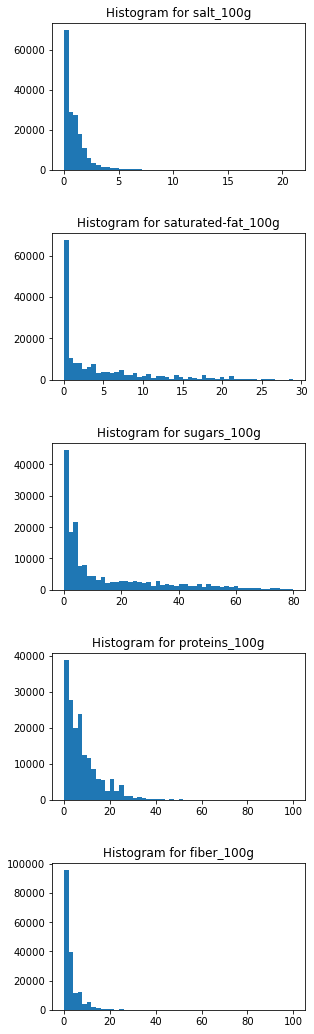

In [212]:
#let's look at their distributions
fig, axes = plt.subplots(5,figsize=(5,15))
for (x, row) in zip(
    ['salt_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g'], [0, 1, 2, 3, 4]  
):  
    axes[row].hist(df_q1[x], bins=50)
    axes[row].set_title("Histogram for {}".format(x))
    
fig.tight_layout(pad=3.0);

In [213]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
Normalized_dfq1=min_max_scaler.fit_transform(df_q1[['salt_100g','saturated-fat_100g','sugars_100g','proteins_100g','fiber_100g']])
Ndfq1=pd.DataFrame(Normalized_dfq1)

In [214]:
Ndfq1.columns=[old_column +'_portion' for old_column in df_q1.columns[1:6]]
Ndfq1.set_index(df_q1.index,inplace=True)

In [215]:
Ndfq1.columns

Index(['salt_100g_portion', 'saturated-fat_100g_portion',
       'sugars_100g_portion', 'proteins_100g_portion', 'fiber_100g_portion'],
      dtype='object')

In [216]:
df_q1_concat = pd.concat([df_q1,Ndfq1],axis=1)
df_q1_concat.columns = df_q1_concat.columns.str.replace('-','_')

In [217]:
df_q1_concat

,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion
product_name,,,,,,,,,,,
Banana Chips Sweetened (Whole),United States,0.00000,28.57,14.29,3.57,3.6,0.000000,0.985172,0.178625,0.0357,0.036
Peanuts,United States,0.63500,0.00,17.86,17.86,7.1,0.030238,0.000000,0.223250,0.1786,0.071
Organic Salted Nut Mix,United States,1.22428,5.36,3.57,17.86,7.1,0.058299,0.184828,0.044625,0.1786,0.071
Organic Muesli,United States,0.13970,4.69,15.62,14.06,9.4,0.006652,0.161724,0.195250,0.1406,0.094
Zen Party Mix,United States,1.60782,5.00,3.33,16.67,6.7,0.076563,0.172414,0.041625,0.1667,0.067
...,...,...,...,...,...,...,...,...,...,...,...
Fairy tail,France,12.00000,12.00,12.00,12.00,12.0,0.571429,0.413793,0.150000,0.1200,0.120
Fairy Tail,France,0.00000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000
"Biscuits aux cereales, aux pepites de chocolat et aux noisettes",France,0.28000,9.00,27.00,8.00,5.0,0.013333,0.310345,0.337500,0.0800,0.050


We want to define a score. As Nutrition score is highly correlated with saturated_fat and sugars, I will add a larger factor to those variables. Proteins and fibers are taken as negative factors as it is supposed to lead to a better nutrition score.

In [218]:
def f(x):
    return (2*((x.sugars_100g_portion)+(x.saturated_fat_100g_portion))+(x.salt_100g_portion)-(x.proteins_100g_portion)-(x.fiber_100g_portion))

In [219]:
df_q1_concat['score']=df_q1_concat.apply(f, axis=1)
df_q1_concat.groupby('product_name').sum()

,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,
,4.925245,0.10,27.35,11.96,6.30,0.234535,0.003448,0.341875,0.1196,0.0630,0.742582
&quot;&quot;,1.080000,3.33,20.00,6.67,3.33,0.051429,0.114828,0.250000,0.0667,0.0333,0.681084
18 marrons glaces,0.050038,0.10,56.00,0.80,4.80,0.002383,0.003448,0.700000,0.0080,0.0480,1.353279
"6 carres fourres, saveur amande",0.530000,6.20,34.30,5.50,2.60,0.025238,0.213793,0.428750,0.0550,0.0260,1.229324
8 Beignet de crevette,1.750000,0.80,9.90,5.10,0.40,0.083333,0.027586,0.123750,0.0510,0.0040,0.331006
...,...,...,...,...,...,...,...,...,...,...,...
yogourt pomme poire BIO,0.101600,1.70,14.00,3.50,0.00,0.004838,0.058621,0.175000,0.0350,0.0000,0.437079
yogurtsmootg and creamy,0.149860,0.59,12.35,4.12,0.00,0.007136,0.020345,0.154375,0.0412,0.0000,0.315376
yopa! citron,0.160000,1.40,13.00,7.40,0.10,0.007619,0.048276,0.162500,0.0740,0.0010,0.354171


In [220]:
df_q1_concat.loc[df_q1_concat.countries.str.contains(',')]

,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,,
All Butter Belgian White Chocolate Chunk Cookies,"France,United Kingdom",1.00000,17.00,33.50,5.50,1.3,0.047619,0.586207,0.418750,0.0550,0.013,1.989533
Stem Ginger Dunkers,"France,United Kingdom",0.57000,13.70,31.80,6.10,3.3,0.027143,0.472414,0.397500,0.0610,0.033,1.672970
Chicken pad tha,"France,United Kingdom",0.75000,0.70,2.90,8.40,1.1,0.035714,0.024138,0.036250,0.0840,0.011,0.061490
6 Ultimate Crumpets,"France,United Kingdom",1.23000,0.10,1.50,5.90,1.9,0.058571,0.003448,0.018750,0.0590,0.019,0.024968
Honey roast ham,"France,United Kingdom",2.00000,0.70,2.90,24.50,0.1,0.095238,0.024138,0.036250,0.2450,0.001,-0.029986
...,...,...,...,...,...,...,...,...,...,...,...,...
So Good Unsweetened Almond Milk Dairy Substitute Uht,"Australia,France",0.36000,0.10,0.10,0.60,0.3,0.017143,0.003448,0.001250,0.0060,0.003,0.017539
Pic's peanut butter,"Singapore,United States",0.50800,3.33,3.33,23.33,6.7,0.024190,0.114828,0.041625,0.2333,0.067,0.036796
Nouilles orientales arme de boeuf 85 g - Mamee,"France,Switzerland",3.06324,9.30,10.20,10.00,10.6,0.145869,0.320690,0.127500,0.1000,0.106,0.836248


In [221]:
df_q1 = df_q1_concat.assign(countries=df_q1_concat.countries.str.split(",")).explode('countries')
df_q1

,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,,
Banana Chips Sweetened (Whole),United States,0.00000,28.57,14.29,3.57,3.6,0.000000,0.985172,0.178625,0.0357,0.036,2.255895
Peanuts,United States,0.63500,0.00,17.86,17.86,7.1,0.030238,0.000000,0.223250,0.1786,0.071,0.227138
Organic Salted Nut Mix,United States,1.22428,5.36,3.57,17.86,7.1,0.058299,0.184828,0.044625,0.1786,0.071,0.267604
Organic Muesli,United States,0.13970,4.69,15.62,14.06,9.4,0.006652,0.161724,0.195250,0.1406,0.094,0.486001
Zen Party Mix,United States,1.60782,5.00,3.33,16.67,6.7,0.076563,0.172414,0.041625,0.1667,0.067,0.270940
...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy tail,France,12.00000,12.00,12.00,12.00,12.0,0.571429,0.413793,0.150000,0.1200,0.120,1.459015
Fairy Tail,France,0.00000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000,0.000000
"Biscuits aux cereales, aux pepites de chocolat et aux noisettes",France,0.28000,9.00,27.00,8.00,5.0,0.013333,0.310345,0.337500,0.0800,0.050,1.179023


In [222]:
#We can verify that there is no more countries separated
df_q1.loc[df_q1.countries.str.contains(',')]

,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,,


In [223]:
#we can see that some countries still have some undesirable characters.
df_q1.loc[df_q1.countries.str.contains('[a-z]*:')]


,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,,
Spaghettini,fr:Quebec,0.0050,0.30,3.0,12.0,3.0,0.000238,0.010345,0.03750,0.120,0.030,-0.054072
Pains pour Hamburger x6,fr:Deutschland,1.2300,1.00,7.0,9.7,3.0,0.058571,0.034483,0.08750,0.097,0.030,0.175537
Pains pour Hamburger x6,fr:Frankreich,1.2300,1.00,7.0,9.7,3.0,0.058571,0.034483,0.08750,0.097,0.030,0.175537
Cereales fourrees la noisette,fr:Deutschland,0.5700,3.50,36.0,5.6,4.9,0.027143,0.120690,0.45000,0.056,0.049,1.063522
Cereales fourrees la noisette,fr:Frankreich,0.5700,3.50,36.0,5.6,4.9,0.027143,0.120690,0.45000,0.056,0.049,1.063522
Mango Scheiben gezuckert,fr:Deutschland,0.0100,0.00,13.4,1.3,0.0,0.000476,0.000000,0.16750,0.013,0.000,0.322476
Vegetarisches Gemseschnitzel,fr:Deutschland,1.8000,1.40,5.8,4.3,4.2,0.085714,0.048276,0.07250,0.043,0.042,0.242266
Vegetarische Burgerscheiben auf Basis von Soja- und Weizeneiwei,fr:Deutschland,1.1000,0.70,2.7,18.7,8.7,0.052381,0.024138,0.03375,0.187,0.087,-0.105843
Vegetarische Burgerscheiben auf Basis von Soja- und Weizeneiwei,fr:Spanien,1.1000,0.70,2.7,18.7,8.7,0.052381,0.024138,0.03375,0.187,0.087,-0.105843


In [224]:
def transform(x):
    x=x.str.replace('[a-z]*:','' )
    x=x.str.replace('Deutschland','Germany' )
    x=x.str.replace('Frankreich','France' )
    x=x.str.replace('Spanien','Spain' )
    x=x.str.replace('Bourgogne-aube-nogent-sur-seine','France' )
    x=x.str.replace('Puyricard','France' )
    x=x.str.replace('Puyricard','France' )
    x=x.str.replace('Nederland','Netherlands' )
    x=x.str.replace('Belgien','Belgium' )
    x=x.str.replace('Schweiz','Switzerland' )
    
    return(x)

In [225]:
df_q1['countries'] = transform(df_q1['countries'])

In [226]:
df_q1.drop_duplicates(inplace=True)
df_q1

,countries,salt_100g,saturated_fat_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g_portion,saturated_fat_100g_portion,sugars_100g_portion,proteins_100g_portion,fiber_100g_portion,score
product_name,,,,,,,,,,,,
Banana Chips Sweetened (Whole),United States,0.00000,28.57,14.29,3.57,3.6,0.000000,0.985172,0.178625,0.0357,0.036,2.255895
Peanuts,United States,0.63500,0.00,17.86,17.86,7.1,0.030238,0.000000,0.223250,0.1786,0.071,0.227138
Organic Salted Nut Mix,United States,1.22428,5.36,3.57,17.86,7.1,0.058299,0.184828,0.044625,0.1786,0.071,0.267604
Organic Muesli,United States,0.13970,4.69,15.62,14.06,9.4,0.006652,0.161724,0.195250,0.1406,0.094,0.486001
Zen Party Mix,United States,1.60782,5.00,3.33,16.67,6.7,0.076563,0.172414,0.041625,0.1667,0.067,0.270940
...,...,...,...,...,...,...,...,...,...,...,...,...
La pratique du vocabulaire allemand,France,12.00000,15.00,53.00,5.00,2.0,0.571429,0.517241,0.662500,0.0500,0.020,2.860911
Verrine Cheescake Myrtille,France,0.29000,12.00,10.50,8.70,0.0,0.013810,0.413793,0.131250,0.0870,0.000,1.016896
Fiche Brevet,France,10.00000,1.00,1.00,10.00,10.0,0.476190,0.034483,0.012500,0.1000,0.100,0.370156


In [227]:
#We can now establish our score based on the 118639 rows.
countries_score = df_q1[['countries','score']]
countries_score

,countries,score
product_name,,
Banana Chips Sweetened (Whole),United States,2.255895
Peanuts,United States,0.227138
Organic Salted Nut Mix,United States,0.267604
Organic Muesli,United States,0.486001
Zen Party Mix,United States,0.270940
...,...,...
La pratique du vocabulaire allemand,France,2.860911
Verrine Cheescake Myrtille,France,1.016896
Fiche Brevet,France,0.370156


In [228]:
Score = countries_score.groupby('countries').sum()
Score

,score
countries,
Albania,1.316589
Algeria,8.734821
Andorra,0.059306
Argentina,1.615814
Aruba,0.742028
...,...
United Arab Emirates,3.696090
United Kingdom,152.451648
United States,49207.931543


In [229]:
n = countries_score['countries'].value_counts()
n.to_frame()

,countries
United States,75654
France,36262
Switzerland,4871
Belgium,426
Germany,288
...,...
Yemen,1
Kuwait,1
Quebec,1
Qatar,1


In [230]:
df_q1_score = Score.join(n)

In [231]:
df_q1_score['mean score'] = df_q1_score['score']/df_q1_score['countries']

In [232]:
#I decided to select the top 10 countries in term of number of entries.
df_q1_final = df_q1_score.nlargest(10, 'countries')

In [233]:
df_q1_final.sort_values('mean score', ascending=True)

,score,countries,mean score
countries,,,
Spain,129.977467,236,0.550752
Italy,51.415935,92,0.558869
France,21150.465697,36262,0.583268
Canada,39.335409,66,0.595991
Switzerland,3078.399269,4871,0.631985
Netherlands,35.492769,56,0.633799
Germany,184.210456,288,0.639620
United States,49207.931543,75654,0.650434
United Kingdom,152.451648,230,0.662833


It is important to remind that a lowest score is desirable. We can see that Spain, Italy and France have the lowest mean score. (Could it be due to the great benefit of mediterannean food?)

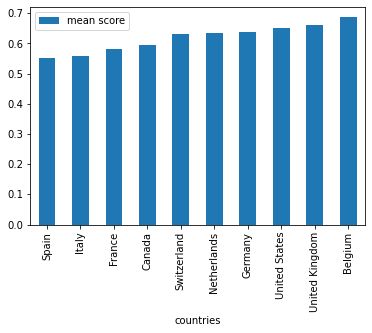

In [234]:
df_q1_final.sort_values('mean score', ascending=True).plot(y='mean score',kind='bar');

## B2. We would like to know which brands use the most plastic in its packaging?

We will first perform some data cleaning.

In [235]:
q2 = df_food.copy()

In [236]:
df_q2 = q2[['brands','packaging']].dropna()
df_q2

,brands,packaging
product_name,,
Biscuits sables fourrage au cacao,St Michel,"Carton,boîte"
Pte au poulet,Kirkland Signature,Frais
"Gotta-have grape, seriously strawberry flavor",Nerds,Carton
The de Nol aromatise orange-cannelle,Alice Délice,aluminium
Sirops pour ganache macarons,Alice Délice,"Carton,Bouteille,Verre"
...,...,...
Les Belles Tranches Bacon fume,Justin Bridou,"Barquette,Plastique"
Rillette d'oie,"Sans marque,D.Lambert","Pot,Verre"
Tomato & ricotta,Panzani,Plastique


In [237]:
df_q2.loc[:,'packaging'] = df_q2.loc[:,'packaging'].str.replace("é","e")
df_q2.loc[:,'packaging'] = df_q2.loc[:,'packaging'].str.replace('[^\x00-\x7F]',"")

In [238]:
df_q2.loc[df_q2.packaging.str.contains(',')]

,brands,packaging
product_name,,
Biscuits sables fourrage au cacao,St Michel,"Carton,bote"
Sirops pour ganache macarons,Alice Délice,"Carton,Bouteille,Verre"
Chair saucisse,Sovivo,"Barquette,Plastique"
Financiers aux Amandes,Bijou,"Bote carton,Sachet plastique"
Curiously Strong Mints,Marks & Spencer,"metal,box"
...,...,...
Fisherman's Friend Miel-Citron,Fisherman's Friend,"Sachet,Plastique"
Dessert Noir (lot de 2),"Nestlé,Nestlé Dessert","Papier,Plastique"
Mousline au Lait de Normandie,"Maggi,Mousline","Bote,carton,sachet,plastique"


In [239]:
df_q2.loc[~(df_q2.packaging.str.contains(',')) ].packaging.value_counts().head(50)

Carton                        1252
Conserve                       869
Plastique                      759
carton                         358
plastique                      293
Sachet plastique               172
Sachet                         168
Kunststoff                     162
conserve                       141
Papier                         118
sachet                         112
Surgele                         91
Glas                            91
Plastic                         91
Brique                          76
Verre                           75
Bouteille                       71
pot                             66
Bocal                           52
bouteille                       51
Karton                          50
bote                            45
papier                          42
Frais                           41
sachet plastique                41
Artikel                         41
Box                             41
barquette                       40
Bote                

In [240]:
df_q2.packaging = df_q2.packaging.str.lower()

In [241]:
df_q2.loc[~(df_q2.packaging.str.contains(',')) ].packaging.value_counts()

carton                   1610
plastique                1052
conserve                 1011
sachet                    280
sachet plastique          221
                         ... 
platique                    1
sous plastique              1
bouteille pp                1
conserve en aluminium       1
nl:karton                   1
Name: packaging, Length: 682, dtype: int64

In [242]:
df_q2['packaging'] = np.where(~(df_q2.packaging.str.contains(',')) & ((df_q2.packaging.str.contains('pls')) | (df_q2.packaging.str.contains('plastic'))),'plastique',df_q2.packaging)

In [243]:
df_q2.loc[~(df_q2.packaging.str.contains(',')) & df_q2.packaging.str.contains('can')].packaging.value_counts()

canette                                   55
canned                                    18
can                                       17
metal can                                  4
round can                                  1
canette metal  recycler                    1
canette alu                                1
individually wrapped chocolate candies     1
steel can                                  1
cannette                                   1
aluminium can                              1
canette metal                              1
Name: packaging, dtype: int64

In [244]:
df_q2.shape

(33575, 2)

In [245]:
df_q2.drop(df_q2.loc[~(df_q2.packaging.str.contains('.*[A-Za-z]'))].index, inplace=True)

In [246]:
#We will consider that when there is plastic among other components, the brand goes into the plastic category
df_q2['packaging_category']=df_q2.packaging

In [247]:
df_q2['packaging_category'] = np.where((df_q2.packaging_category.str.contains(',')) & ((df_q2.packaging.str.contains('pls')) | (df_q2.packaging.str.contains('plastic')) | (df_q2.packaging.str.contains('plastique')) ),'plastique',df_q2.packaging_category)

In [248]:
df_q2.loc[(df_q2.packaging_category.str.contains(',')) & ((df_q2.packaging_category.str.contains('can')) | (df_q2.packaging_category.str.contains('metal')) | (df_q2.packaging_category.str.contains('conserve'))) & (df_q2.packaging_category.str.contains('verre'))  ].packaging_category.value_counts()

bocal,verre,couvercle,metal                                           355
verre,bocal,metal                                                      68
bocal,verre,couvercle,metal,conserve                                   58
pot,verre,couvercle,metal                                              34
bocal,verre,metal                                                      33
                                                                     ... 
bouteille,verre,bouteille en verre brune,en:green dot,en:metal cap      1
bocal,verre,couvercle,metal,frais                                       1
pot,verre,opercule,metal,etui,carton,frais                              1
bocal,verre,metal,frais                                                 1
bocal,verre,couvercle metallique                                        1
Name: packaging_category, Length: 128, dtype: int64

In [249]:
df_q2['packaging_category'] = np.where(((df_q2.packaging_category.str.contains(',')) & ((df_q2.packaging_category.str.contains('can')) | (df_q2.packaging_category.str.contains('metal')) | (df_q2.packaging_category.str.contains('conserve'))) & (df_q2.packaging_category.str.contains('verre')) & (df_q2.packaging_category.str.contains('couvercle'))),'verre',df_q2.packaging_category)

In [250]:
df_q2.packaging_category = np.where((df_q2.packaging_category.str.contains('bocal,verre') | df_q2.packaging_category.str.contains('bouteille,verre') | df_q2.packaging_category.str.contains('verre,bocal') | df_q2.packaging_category.str.contains('verre,bouteille') | df_q2.packaging_category.str.contains('pot,verre') | df_q2.packaging_category.str.contains('pot,verre')| df_q2.packaging_category.str.contains('verre,pot')),'verre',df_q2.packaging_category)

In [251]:
df_q2.packaging_category.value_counts().head(50)

plastique                        18711
verre                             3572
carton                            1608
conserve                          1010
carton,surgele                     425
brique,carton                      315
conserve,metal                     314
sachet                             280
bote,carton                        279
sachet plastique                   221
kunststoff                         163
papier                             160
sachet,papier                      147
bouteille                          122
carton,bote                        118
conserve,conserve                  114
surgele                            110
carton,aluminium                   106
glas                               102
brique                             100
pot                                 97
bocal                               90
bote                                85
bote,conserve,metal                 83
carton,carton                       64
box                      

In [252]:
df_q2.packaging_category = np.where((df_q2.packaging_category.str.contains('brique,carton') | df_q2.packaging_category.str.contains('bote,carton ') | df_q2.packaging_category.str.contains('carton,bote ') | df_q2.packaging_category.str.contains('boite,carton') | df_q2.packaging_category.str.contains('carton,brique')),'carton',df_q2.packaging_category)

In [253]:
df_q2.packaging_category.value_counts().head(50)

plastique                        18711
verre                             3572
carton                            2098
conserve                          1010
carton,surgele                     425
conserve,metal                     314
sachet                             280
bote,carton                        279
sachet plastique                   221
kunststoff                         163
papier                             160
sachet,papier                      147
bouteille                          122
carton,bote                        118
conserve,conserve                  114
surgele                            110
carton,aluminium                   106
glas                               102
brique                             100
pot                                 97
bocal                               90
bote                                85
bote,conserve,metal                 83
carton,carton                       64
box                                 60
flacon,verre             

In [254]:
df_q2.packaging_category = np.where((df_q2.packaging_category.str.contains('conserve,metal') | df_q2.packaging_category.str.contains('conserve,conserve') | df_q2.packaging_category.str.contains('bote,conserve,metal') | df_q2.packaging_category.str.contains('bote,metal') | df_q2.packaging_category.str.contains('conserve,aluminium')),'conserve',df_q2.packaging_category)

In [255]:
def transform(x):
    x=x.str.replace('canette','conserve' )
    x=x.str.replace('brique','carton')
    x=x.str.replace('glas','verre')
    x=x.str.replace('glas','verre')
    x=x.str.replace('sachet plastique','plastique')
    x=x.str.replace('kunststoff','plastique')
    x=x.str.replace('carton,carton','carton')
    x=x.str.replace('bouteille plastique','plastique')
    x=x.str.replace('barquette plastique','plastique')
    x=x.str.replace('verre,flacon','verre')
    x=x.str.replace('flacon,verre','verre')
    x=x.str.replace('bote,carton','carton')
    x=x.str.replace('carton,bote','carton')
    return(x)

In [256]:
df_q2['packaging_category'] = transform(df_q2['packaging_category'])

In [257]:
df_q2.drop('packaging',axis=1,inplace=True)

In [258]:
df_q2.packaging_category.value_counts().head(50)

plastique                        19169
verre                             3763
carton                            2685
conserve                          1840
carton,surgele                     461
sachet                             280
papier                             160
sachet,papier                      147
bouteille                          122
surgele                            110
carton,aluminium                   107
pot                                 97
bocal                               90
surgele,carton                      88
bote                                85
carton,sachet                       69
box                                 60
frais                               58
barquette                           58
packung                             55
karton                              50
bottle                              46
etui,carton                         43
artikel                             41
aluminium                           39
carton,sachets           

In [259]:
#We will now keep only brands that have more than one product
brand_keep = df_q2.groupby('brands').count()>1

In [260]:
brand_keep[brand_keep].dropna()

,packaging_category
brands,
1001 delights,1.0
1664,1.0
"365, 365 Everyday Value, Whole Foods Market Inc.",1.0
7 Days,1.0
9Bar,1.0
...,...
"Épi d'Or,Marque Repère,Leclerc",1.0
Éric Bur,1.0
Évian,1.0


In [261]:
df_q2.loc[df_q2.brands.isin (brand_keep[brand_keep].dropna().index)]

,brands,packaging_category
product_name,,
Biscuits sables fourrage au cacao,St Michel,carton
Pte au poulet,Kirkland Signature,frais
The de Nol aromatise orange-cannelle,Alice Délice,aluminium
Sirops pour ganache macarons,Alice Délice,verre
Chair saucisse,Sovivo,plastique
...,...,...
Dessert Noir (lot de 2),"Nestlé,Nestlé Dessert",plastique
Mousline au Lait de Normandie,"Maggi,Mousline",plastique
Kirkland Microwave Popcorn,Kirkland,bag


In [262]:
#for the purpose of this question, we will look at only the most famous type of packaging, that is "plastique, verre, carton, conserve"
packaging_keep = df_q2.groupby('packaging_category').count().sort_values(by='brands',ascending=False).head(4)

In [263]:
df_q2_final = df_q2.loc[df_q2.packaging_category.isin (packaging_keep.index)]
df_q2_final

,brands,packaging_category
product_name,,
Biscuits sables fourrage au cacao,St Michel,carton
"Gotta-have grape, seriously strawberry flavor",Nerds,carton
Sirops pour ganache macarons,Alice Délice,verre
Chair saucisse,Sovivo,plastique
Financiers aux Amandes,Bijou,plastique
...,...,...
Les Belles Tranches Bacon fume,Justin Bridou,plastique
Rillette d'oie,"Sans marque,D.Lambert",verre
Tomato & ricotta,Panzani,plastique


In [264]:
df_q2_final.brands.value_counts().head(50)

Carrefour                     962
Auchan                        715
Casino                        529
U                             524
Cora                          499
Leader Price                  471
Fleury Michon                 272
Netto                         250
Monoprix                      192
Migros                        176
Nestlé                        161
Winny                         146
Sans marque                   144
Monique Ranou                 143
Dia                           139
Haribo                        129
Marks & Spencer               125
Franprix                      120
Picard                        114
Bonne Maman                   111
Panzani                       105
Chabrior                       99
Belle France                   98
La Vie Claire                  94
Lay's                          91
Bjorg                          87
Bonduelle                      81
Danone                         79
Reflets de France              77
Bio Village,Ma

In [265]:
df_q2_final.brands = np.where((df_q2_final.brands.str.contains(',Marque Repère')),'Marque Repère',df_q2_final.brands)

/Users/lauragztto/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [266]:
df_q2_final.brands = np.where((df_q2_final.brands.str.contains(',Nestlé')),'Nestlé',df_q2_final.brands)

In [267]:
df_q2_final.loc[df_q2_final.brands.str.contains(',')]

,brands,packaging_category
product_name,,
Honey roast ham,"Marks & Spencer,M&S",plastique
Pancakes au Chocolat belge,"Marks & Spencer,Marks and Spencer",plastique
Chipotle pepper sauce - smoked red Jalapeos,"Tabasco,Mc Ilhenny Co.",verre
"Sweet Potato, Parsnip and Beetroot Hand Cooked Vegetable Crisps","Marks & Spencer,Marks and Spencer",plastique
Jamaican Jerk Spiced Chicken Soup,"Sainsbury's,Sainsbury's Taste The Difference",plastique
...,...,...
36 Biscottes compltes,"Monoprix,Monoprix Bio !",plastique
Cheddar Fondu,"Chesdale,Mainland",plastique
Sauce pimentee l'ail,"Yeo's,Yeo Hiap Seng (Malaysia) Bhd",verre


In [268]:
df_q2_final.brands = np.where((df_q2_final.brands.str.contains(',Marks & Spencer') | df_q2_final.brands.str.contains(',M&S') | df_q2_final.brands.str.contains(',Marks and Spencer')),'Marks & Spencer',df_q2_final.brands)

/Users/lauragztto/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [269]:
df_q2_final.brands = np.where((df_q2_final.brands.str.contains(',Monoprix') | df_q2_final.brands.str.contains('Monoprix,')),'Monoprix',df_q2_final.brands)

In [270]:
#for this question, we will only take the 20 first brands.
final_brands=df_q2_final.brands.value_counts().head(20)

In [271]:
final_brands

Carrefour          962
Marque Repère      844
Auchan             715
Casino             529
U                  524
Cora               499
Leader Price       471
Monoprix           300
Nestlé             299
Fleury Michon      272
Netto              250
Migros             176
Winny              146
Sans marque        144
Monique Ranou      143
Dia                139
Marks & Spencer    136
Haribo             129
Franprix           120
Picard             114
Name: brands, dtype: int64

In [272]:
df_q2_final = df_q2_final.loc[df_q2_final.brands.isin (final_brands.index)]

In [273]:
Packaging = df_q2_final.groupby('brands')['packaging_category'].value_counts().unstack().fillna(0)

In [274]:
Packaging

packaging_category,carton,conserve,plastique,verre
brands,,,,
Auchan,84.0,96.0,462.0,73.0
Carrefour,94.0,99.0,667.0,102.0
Casino,61.0,59.0,344.0,65.0
Cora,47.0,54.0,373.0,25.0
Dia,20.0,16.0,88.0,15.0
Fleury Michon,5.0,0.0,267.0,0.0
Franprix,8.0,5.0,95.0,12.0
Haribo,0.0,0.0,129.0,0.0
Leader Price,39.0,52.0,326.0,54.0


In [275]:
Packaging['total']=Packaging.sum(axis=1)
Packaging

packaging_category,carton,conserve,plastique,verre,total
brands,,,,,
Auchan,84.0,96.0,462.0,73.0,715.0
Carrefour,94.0,99.0,667.0,102.0,962.0
Casino,61.0,59.0,344.0,65.0,529.0
Cora,47.0,54.0,373.0,25.0,499.0
Dia,20.0,16.0,88.0,15.0,139.0
Fleury Michon,5.0,0.0,267.0,0.0,272.0
Franprix,8.0,5.0,95.0,12.0,120.0
Haribo,0.0,0.0,129.0,0.0,129.0
Leader Price,39.0,52.0,326.0,54.0,471.0


In [276]:
Packaging_prop = Packaging[['carton','conserve','plastique','verre']].div(Packaging.total,axis=0)
Packaging_prop

packaging_category,carton,conserve,plastique,verre
brands,,,,
Auchan,0.117483,0.134266,0.646154,0.102098
Carrefour,0.097713,0.102911,0.693347,0.106029
Casino,0.115312,0.111531,0.650284,0.122873
Cora,0.094188,0.108216,0.747495,0.050100
Dia,0.143885,0.115108,0.633094,0.107914
Fleury Michon,0.018382,0.000000,0.981618,0.000000
Franprix,0.066667,0.041667,0.791667,0.100000
Haribo,0.000000,0.000000,1.000000,0.000000
Leader Price,0.082803,0.110403,0.692144,0.114650


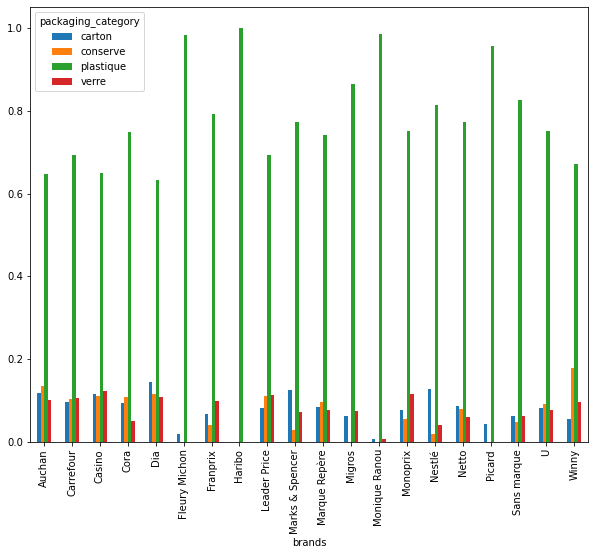

In [277]:
Packaging_prop.plot(kind='bar', figsize=(10,8));

In [278]:
Packaging_prop.sort_values(by='plastique',ascending=False)

packaging_category,carton,conserve,plastique,verre
brands,,,,
Haribo,0.000000,0.000000,1.000000,0.000000
Monique Ranou,0.006993,0.000000,0.986014,0.006993
Fleury Michon,0.018382,0.000000,0.981618,0.000000
Picard,0.043860,0.000000,0.956140,0.000000
Migros,0.062500,0.000000,0.863636,0.073864
Sans marque,0.062500,0.048611,0.826389,0.062500
Nestlé,0.127090,0.020067,0.812709,0.040134
Franprix,0.066667,0.041667,0.791667,0.100000
Marks & Spencer,0.125000,0.029412,0.772059,0.073529


We can see that Haribo, Monique Ranou and Fleury Michon are the brands among the selections that use the most plastic. 

## B3. We would like to look now at the correlations between all the different kind of fats.

In [279]:
df_q3 = df_food.copy()

In [280]:
fats = df_q3[['fat_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'trans-fat_100g']]

In [281]:
fats.corr()

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g
fat_100g,1.000000,0.688772,0.865102,0.697046,0.044217
saturated-fat_100g,0.688772,1.000000,0.316351,0.219237,0.022924
monounsaturated-fat_100g,0.865102,0.316351,1.000000,0.436391,0.037862
polyunsaturated-fat_100g,0.697046,0.219237,0.436391,1.000000,0.025627
trans-fat_100g,0.044217,0.022924,0.037862,0.025627,1.000000


We can see that the different kind of fats are highly positively correlated, except trans-fat. According to the American Heart Association, transfat increase the level of "bad" cholesterol and decrease the level of "good" cholestherol. It could be interessing to check what is the correlation between transfat and cholesterol.

In [282]:
tc = df_q3[['trans-fat_100g','cholesterol_100g']]

In [283]:
tc.corr()

,trans-fat_100g,cholesterol_100g
trans-fat_100g,1.000000,-0.000741
cholesterol_100g,-0.000741,1.000000


The correlation between both here is almost null. We can not take a meaningfull insight from this.

## Task C : Text data

In [284]:
df_c = df_food['ingredients_text']

In [285]:
#we first convert everything in lowercases
df_c.str.lower()
df_c.head()

product_name
Farine de ble noir                                                              NaN
Banana Chips Sweetened (Whole)    Bananas, vegetable oil (coconut oil, corn oil ...
Peanuts                           Peanuts, wheat flour, sugar, rice flour, tapio...
Organic Salted Nut Mix            Organic hazelnuts, organic cashews, organic wa...
Organic Polenta                                                     Organic polenta
Name: ingredients_text, dtype: object

In [286]:
def transform(x):
    x = x.str.replace('é','e')
    x = x.str.replace('[^\x00-\x7F]',"") 
    x = x.str.replace('[\W_] & [^\.,]','')
    x=x.str.replace(' ,',',')
    x=x.str.replace(' et',',')
    x=x.str.replace(',  ,','')
    return x

In [287]:
df_c1 = transform(df_c)

In [288]:
df_c1[df_c1.str.contains('[\W_]', na=False)].head().to_list()

['Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.',
 'Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.',
 'Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.',
 'Organic polenta',
 'Rolled oats, grape concentrate, expeller pressed canola oil, sunflower seeds, almonds, walnuts oat bran, sesame seeds, cashews, natural vitamin e.']

In [289]:
df_c2 = df_c1.str.split(',', expand=True)
df_c2.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
product_name,,,,,,,,,,,,,,,,,,,,,
Farine de ble noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Chips Sweetened (Whole),Bananas,vegetable oil (coconut oil,corn oil and/or palm oil) sugar,natural banana flavor.,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Peanuts,Peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening (ammonium bicarbonate,baking soda),soy sauce (water,soybeans,...,None,None,None,None,None,None,None,None,None,None
Organic Salted Nut Mix,Organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Organic Polenta,Organic polenta,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [290]:
df_c2_numpy=df_c2.to_numpy()

In [291]:
df_c2_numpy

array([[nan, nan, nan, ..., nan, nan, nan],
       ['Bananas', ' vegetable oil (coconut oil',
        ' corn oil and/or palm oil) sugar', ..., None, None, None],
       ['Peanuts', ' wheat flour', ' sugar', ..., None, None, None],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Citric acid', ' maltodextrin', ' instant tea', ..., None, None,
        None]], dtype=object)

In [292]:
df_c2_m = np.reshape(df_c2_numpy,(-1,1))

In [293]:
df_c2 = pd.DataFrame(df_c2_m)

In [294]:
df_c2.rename(columns={0:'ingredients'}, inplace=True)

In [295]:
df_c2.ingredients.dropna(inplace=True)

In [296]:
df_c2.ingredients.value_counts().head(6)

 salt           80463
 sugar          50911
 water          47158
 sel            23730
 citric acid    23700
 niacin         18757
Name: ingredients, dtype: int64

We can see that the 5 most used ingredients are salt, sugar, water, citric acid and niacin

## Task D : Time series data

At first, we would like to compute the mean time difference between the created and modified time of products.

In [297]:
Time = df_food[['created_datetime',
 'last_modified_datetime']]

we will convert them to TimeStamp object to be able to get the required infos easily

In [298]:
created = pd.to_datetime(Time.created_datetime)
modified = pd.to_datetime(Time.last_modified_datetime)

In [299]:
abs(created-modified).mean()

Timedelta('55 days 01:05:09.394753')

So the mean difference between the date of creation and the date of modification is 55 days, 1 hour and 9 seconds

In [300]:
df_d = pd.DataFrame(created)

In [301]:
df_d

,created_datetime
product_name,
Farine de ble noir,2016-09-17 09:17:46+00:00
Banana Chips Sweetened (Whole),2017-03-09 14:32:37+00:00
Peanuts,2017-03-09 14:32:37+00:00
Organic Salted Nut Mix,2017-03-09 10:35:31+00:00
Organic Polenta,2017-03-09 10:34:13+00:00
...,...
Tomato & ricotta,2017-03-27 16:14:59+00:00
"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",2017-03-09 11:31:16+00:00
Biscottes bio,2017-06-09 14:29:09+00:00


We should add back the unique code of each product as some product are the same

In [302]:
df_d['code']=df_food['code']

In [303]:
df_d.set_index('created_datetime', inplace=True)

In [304]:
Month=df_d.to_period('M').index.value_counts().sort_index()
Month

/Users/lauragztto/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


2012-03       7
2012-04       7
2012-05      17
2012-06      58
2012-07      39
           ... 
2017-05    4967
2017-06    4879
2017-07    4231
2017-08    6278
2017-09    3666
Freq: M, Name: created_datetime, Length: 67, dtype: int64

In [305]:
Month = pd.DataFrame(Month)
Month

,created_datetime
2012-03,7
2012-04,7
2012-05,17
2012-06,58
2012-07,39
...,...
2017-05,4967
2017-06,4879
2017-07,4231
2017-08,6278


TypeError: Cannot compare type Period with type float

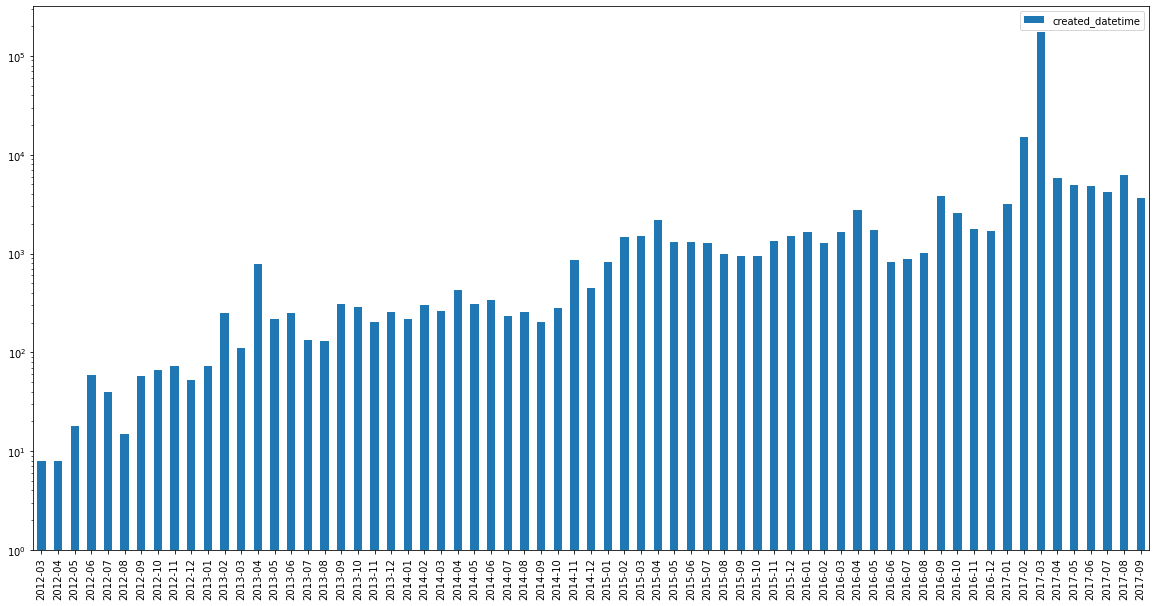

In [306]:
Month.plot(kind='bar', figsize=(20,10), log=True)
plt.xticks(Month.index,labels=Month.index,rotation=45)
plt.title('Total number of items created by month');

We can see that there is a hugh peak in march 2017.

## E Build a database

We first import sqlite3 and select 1000 rows and 5 columns

In [307]:
import sqlite3

In [308]:
#We select 1000 rows and 5 columns
E = df_food.sample(n=1000)
E = E[['code','creator','brands','energy_100g','fat_100g']]
E

,code,creator,brands,energy_100g,fat_100g
product_name,,,,,
"Green Pea Snack, Spicy Sichuan",0804879326786,usda-ndb-import,World Peas,1569.0,7.14
"Lucas, Paletas, Mango",0070640014149,usda-ndb-import,Wells Enterprises Inc.,331.0,0.00
Salad Olives,0092825108740,usda-ndb-import,Brookshire Grocery Company,699.0,16.67
Dark Chocolate Assortment,0857737004746,usda-ndb-import,Les Chocolats De Pauline,2234.0,37.50
Haribo croco,3103220033807,openfoodfacts-contributors,Haribo,1481.0,NaN
...,...,...,...,...,...
Charles VII Craquant,3435070026402,kiliweb,FOSSIER,1979.0,19.00
"Walgreen, Cheese Dip & Breadsticks",0049022777729,usda-ndb-import,Walgreen Co.,1540.0,15.79
"White Cheese Premium Dip With Hatch Chilies, Spicy",0072036706171,usda-ndb-import,Ht Traders,393.0,7.81


Now we want to set up the connection 

In [309]:
db = sqlite3.connect('food_infos.db')

We create the table

In [310]:
query= "CREATE TABLE Food_DataBase (code INTEGER PRIMARY KEY, creator TEXT, brands TEXT, energy_100g FLOAT, fat_100g FLOAT);"

In [311]:
cursor = db.cursor()

In [312]:
cursor.execute(query)

OperationalError: table Food_DataBase already exists

In [313]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [314]:
results = cursor.fetchall()
print(results)

[('Food_DataBase',)]


In [315]:
E.to_sql(name='Food_DataBase', con=db, if_exists='append', index=False)

IntegrityError: UNIQUE constraint failed: Food_DataBase.code

In [316]:
cursor.execute('SELECT code, creator, energy_100g FROM Food_DataBase WHERE energy_100g>200 LIMIT 10')
results=cursor.fetchall()
print(results)

[(18524, 'usda-ndb-import', 1887.0), (58230, 'usda-ndb-import', 1360.0), (58292, 'usda-ndb-import', 1506.0), (509930, 'usda-ndb-import', 1954.0), (541039, 'usda-ndb-import', 473.0), (765152, 'usda-ndb-import', 1569.0), (771795, 'kiliweb', 2669.0), (949705, 'usda-ndb-import', 556.0), (954174, 'usda-ndb-import', 2092.0), (981859, 'usda-ndb-import', 1255.0)]


It seems to work correctly.

## F. Finding Correlations

In [317]:
#check if there are a relationship between nutrition score and the composents used for its notation, that is energy, sugars, saturated fat, salt, proteins and fibers
F= df_food[['nutrition_score','energy_100g','sugars_100g', 'saturated-fat_100g', 'salt_100g','proteins_100g','fiber_100g']].copy()
F.dropna(inplace=True)
F.sort_values(by = 'nutrition_score')

,nutrition_score,energy_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g
product_name,,,,,,,
Lentilles corail bio,-14.0,485.0,1.1,0.20,0.00000,9.7,8.0
Tender Broad Beans in Water,-13.0,305.0,0.5,0.10,0.03000,6.0,4.9
Petits pois doux extra fins,-13.0,248.0,3.0,0.20,0.00000,5.0,4.5
Petits pois extra fins,-13.0,235.0,3.0,0.60,0.01000,5.0,4.3
Fves,-13.0,188.0,0.0,0.00,0.02540,5.0,4.7
...,...,...,...,...,...,...,...
Cappuccino,37.0,3138.0,37.5,37.50,3.81000,37.5,0.0
Cappuccino Decaffeinated,37.0,3138.0,37.5,37.50,3.96748,37.5,0.0
"Tim Hortons, Cafe & Bake Shop Latte",38.0,4184.0,37.5,43.75,4.76250,50.0,0.0


In [318]:
F.corr()

,nutrition_score,energy_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g
nutrition_score,1.000000,0.633669,0.477127,0.644356,0.127991,0.104644,-0.155180
energy_100g,0.633669,1.000000,0.332337,0.541331,-0.037988,0.294342,0.270649
sugars_100g,0.477127,0.332337,1.000000,0.133748,-0.094879,-0.264851,-0.023629
saturated-fat_100g,0.644356,0.541331,0.133748,1.000000,-0.024095,0.170652,-0.006819
salt_100g,0.127991,-0.037988,-0.094879,-0.024095,1.000000,0.046613,-0.017541
proteins_100g,0.104644,0.294342,-0.264851,0.170652,0.046613,1.000000,0.226055
fiber_100g,-0.155180,0.270649,-0.023629,-0.006819,-0.017541,0.226055,1.000000


It is important to remind that a high nutrition score implies a less "healthy" product. As expected, we can see a positive correlation between the nutrition score and the energy, sugar, saturated fat and salt. Indeed these are unfavorable components that increase the score. We can see a negative correlation with fiber_100g as expected. However, it seems that there is a positive correlation with proteins, which should be usually negative.